# Julia 基礎圖表繪製: 圖表結合敘述統計

本範例需要使用到的套件有 StatsBase，請在執行以下範例前先安裝。

```
] add StatsBase
```

In [2]:
using Pkg
Pkg.add("StatsBase")

   Updating registry at `C:\Users\chris-wang\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %.0 %5.3 %.7 %>                                   ]  10.1 %=======>                                 ]  17.0 %.1 %.4 %26.1 %                          ]  33.1 %Fetching: [===============>                         ]  35.9 %.4 %=================>                       ]  41.1 %Fetching: [==================>                      ]  43.3 %45.9 %>                    ]  49.2 % [=====================>                   ]  52.1 %5 %.9 %Fetching: [=========================>               ]  60.3 %Fetching: [==========================>              ]  63.6 % [============================>            ]  68.4 %.5 %.2 % %================================>        ]  79.3 % [=================================>       ]  82.0 %>      ]  84.9 %.8 %=====================================>   ]  90.5 % %=======================================> ]  97.5 %

  Resolving package versions...
   Updating `C:\Users\chris-wang\.julia\environments\v1.4\Project.toml`
  [2913bbd2] + StatsBase v0.32.2
   Updating `C:\Users\chris-wang\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [3]:
using StatsBase, RDatasets
using Gadfly
import Cairo, Fontconfig

┌ Info: Precompiling StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1260
┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1260
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1260


ArgumentError: ArgumentError: Package Cairo not found in current path:
- Run `import Pkg; Pkg.add("Cairo")` to install the Cairo package.


## 鉛直線與水平線

In [4]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [25]:
unique(iris.Species)

3-element Array{String,1}:
 "setosa"
 "versicolor"
 "virginica"

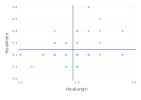

In [22]:
setosa=filter(row->row[:Species]=="setosa",iris)
p = plot(setosa, x="PetalLength",xintercept=[mean(setosa[!,:PetalLength])], y="PetalWidth", yintercept=[mean(setosa[!, :PetalWidth])],
    Geom.vline(color=["black"]),Geom.hline(color=["blue"]), Geom.point)

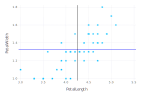

In [26]:
versicolor=filter(row->row[:Species]=="versicolor",iris)
p = plot(versicolor, x="PetalLength",xintercept=[mean(versicolor[!,:PetalLength])], y="PetalWidth", yintercept=[mean(versicolor[!, :PetalWidth])],
    Geom.vline(color=["black"]),Geom.hline(color=["blue"]), Geom.point)

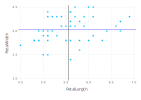

In [27]:
virginica=filter(row->row[:Species]=="virginica",iris)
p = plot(virginica, x="PetalLength",xintercept=[mean(virginica[!,:PetalLength])], y="PetalWidth", yintercept=[mean(virginica[!, :PetalWidth])],
    Geom.vline(color=["black"]),Geom.hline(color=["blue"]), Geom.point)

In [24]:
for one_spec in unique(iris.Species)
    df=filter(row->row[:Species]==one_spec,iris)
    p = plot(df, x="PetalLength",xintercept=[mean(one_spec[!,:PetalLength])], y="PetalWidth", yintercept=[mean(one_spec[!, :PetalWidth])],
        Geom.vline(color=["black"]),Geom.hline(color=["blue"]), Geom.point)
    p
end

MethodError: MethodError: no method matching getindex(::String, ::typeof(!), ::Symbol)
Closest candidates are:
  getindex(::String, !Matched::UnitRange{Int64}) at strings/string.jl:245
  getindex(::String, !Matched::Int64) at strings/string.jl:210
  getindex(::String, !Matched::UnitRange{#s69} where #s69<:Integer) at strings/string.jl:242
  ...

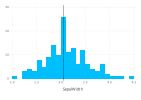

In [5]:
p = plot(iris, x="SepalWidth", xintercept=[mean(iris[!, :SepalWidth])],
    Geom.vline(color=["black"]), Geom.histogram)

## 斜線

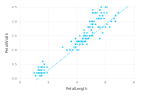

In [0]:
p = plot(iris, x="PetalLength", y="PetalWidth", Geom.point,
    intercept=[-0.5], slope=[0.4], Geom.abline(style=:dash))

In [0]:
draw(PNG("abline.png", 12cm, 9cm), p)

## 資料點標籤

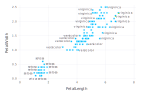

In [0]:
p = plot(iris, x="PetalLength", y="PetalWidth", Geom.point,
    label="Species", Geom.label)

In [0]:
draw(PNG("label.png", 12cm, 9cm), p)

## 子圖

┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ xintercept
└ @ Gadfly C:\Users\chris-wang\.julia\packages\Gadfly\cqMtH\src\Gadfly.jl:494


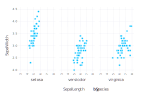

┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ xintercept
└ @ Gadfly C:\Users\chris-wang\.julia\packages\Gadfly\cqMtH\src\Gadfly.jl:494


In [7]:
p = plot(iris, xgroup="Species", x="SepalLength", y="SepalWidth", Geom.subplot_grid(Geom.point))

In [0]:
draw(PNG("subplot.png", 12cm, 9cm), p)